In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

In [2]:
sales=pd.read_csv('/content/final_project_no_skew.csv')


In [3]:
x=sales.drop('Weekly_Sales', axis=1)
y=sales['Weekly_Sales']

In [4]:
x.shape

(421570, 17)

In [5]:
x.head(1)

,Store,Dept,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
0,1,1,1,151315,42.31,2.572,4866.2909,24157.0344,376.8238,1187.4454,4158.9236,211.096358,8.106,0,5,2,2010


In [6]:
y.head(1)

,Weekly_Sales
0,24924.5


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [8]:
x_train.shape

(337256, 17)

In [9]:
scaler=StandardScaler().fit(x_train)
x_train_ss=scaler.transform(x_train)
x_test_ss=scaler.transform(x_test)

In [10]:
x_train_ss

array([[ 0.53080221, -0.82741745,  0.61469205, ..., -0.07688401,
        -0.13917751,  1.2950631 ],
       [ 0.13994851, -0.36827861, -0.88494685, ..., -0.07688401,
         0.1692689 ,  0.04005173],
       [-0.95444183,  1.76343741,  0.61469205, ...,  1.17997605,
         1.09460812,  1.2950631 ],
       ...,
       [-0.95444183, -0.46666551,  0.61469205, ..., -1.10522406,
         0.1692689 ,  1.2950631 ],
       [ 0.60897295, -1.41773881,  2.11433095, ...,  0.49441602,
         0.1692689 ,  1.2950631 ],
       [-0.87627109,  1.17311605, -0.88494685, ..., -0.07688401,
        -0.75607032,  0.04005173]])

In [11]:
x_train_df=pd.DataFrame(x_train_ss,columns=x_train.columns)
x_test_df=pd.DataFrame(x_test_ss,columns=x_test.columns)

In [ ]:
model=Sequential()


model.add(Dense(64,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
model.add(Dense(32,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
model.add(Dense(32,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
model.add(Dense(32,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
model.add(Dense(32,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
model.add(Dense(16,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
model.add(Dense(16,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
model.add(Dense(8,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
model.add(Dense(8,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
model.add(Dense(1)) #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam",loss="mean_squared_error",metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanAbsolutePercentageError()])

In [ ]:
result=model.fit(x_train_df,y_train,epochs=50,validation_split=0.2,batch_size=32)

Epoch 1/50
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 144s 15ms/step - loss: 444501088.0000 - mean_absolute_error: 12811.0576 - mean_absolute_percentage_error: 1516520192.0000 - val_loss: 346654656.0000 - val_mean_absolute_error: 11853.2988 - val_mean_absolute_percentage_error: 1670827392.0000
Epoch 2/50
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 132s 16ms/step - loss: 357946752.0000 - mean_absolute_error: 11336.9932 - mean_absolute_percentage_error: 1327801344.0000 - val_loss: 265727520.0000 - val_mean_absolute_error: 10461.1943 - val_mean_absolute_percentage_error: 1634514048.0000
Epoch 3/50
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 130s 15ms/step - loss: 279563168.0000 - mean_absolute_error: 9730.4375 - mean_absolute_percentage_error: 1959312384.0000 - val_loss: 227120896.0000 - val_mean_absolute_error: 9256.0664 - val_mean_absolute_percentage_error: 1668388224.0000
Epoch 4/50
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 139s 15ms/step - loss: 242807488.0000 - mean_absolute_error: 9098.4307 - mean_absolute_percentage_error: 160659

In [ ]:
result_df=pd.DataFrame(result.history)

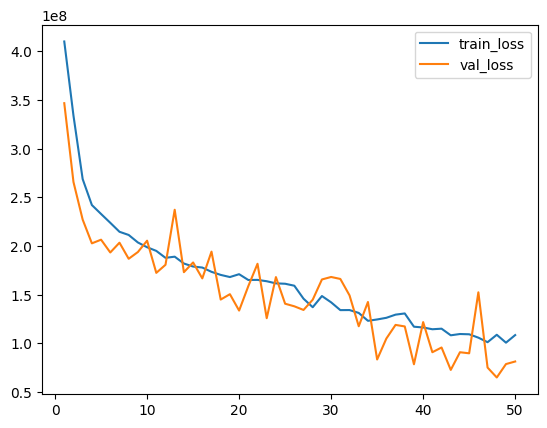

In [ ]:
plt.plot(range(1,51),result_df['loss'],label="train_loss")
plt.plot(range(1,51),result_df['val_loss'],label="val_loss")
plt.legend()
plt.show()

In [ ]:
result_df.iloc[-1]

,49
loss,1.085301e+08
mean_absolute_error,5.143206e+03
mean_absolute_percentage_error,9.907093e+08
val_loss,8.141094e+07
val_mean_absolute_error,4.469316e+03
val_mean_absolute_percentage_error,8.247773e+08


In [ ]:
model.evaluate(x_test_ss, y_test)

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 76085928.0000 - mean_absolute_error: 4435.8936 - mean_absolute_percentage_error: 377627328.0000


[87956432.0, 4542.8271484375, 1116695808.0]

In [ ]:
pred=np.array([1,3,2,151320,45,3,4870,24160,380,1190,4158,220,8,0,5,2,2010])

In [ ]:
pred=[1,1,1,151315,42.31,2.572,4866.2909,24157.0344,376.8238,1187.4454,4158.9236,211.096358,8.106,0,5,2,2010]
te=pd.DataFrame(pred).T
te_ss=scaler.transform(te)
te_df=pd.DataFrame(te_ss)
model.predict(te_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


array([[19054.768]], dtype=float32)

In [ ]:
#model4

In [ ]:
model4=Sequential()

model4.add(Dense(64,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
model4.add(Dense(64,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
model4.add(Dense(1))


model4.compile(optimizer="adam",loss="mean_squared_error",metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanAbsolutePercentageError()])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
result=model4.fit(x_train_df,y_train,epochs=100,validation_split=0.2,batch_size=32)

Epoch 1/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 540600640.0000 - mean_absolute_error: 14363.6230 - mean_absolute_percentage_error: 1897631872.0000 - val_loss: 470353760.0000 - val_mean_absolute_error: 14312.7246 - val_mean_absolute_percentage_error: 2877899776.0000
Epoch 2/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 444110560.0000 - mean_absolute_error: 14149.3291 - mean_absolute_percentage_error: 2573954816.0000 - val_loss: 440642176.0000 - val_mean_absolute_error: 13889.4258 - val_mean_absolute_percentage_error: 2692495616.0000
Epoch 3/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 419450720.0000 - mean_absolute_error: 13403.8291 - mean_absolute_percentage_error: 2195038464.0000 - val_loss: 421713984.0000 - val_mean_absolute_error: 13176.6758 - val_mean_absolute_percentage_error: 2193063680.0000
Epoch 4/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 405930528.0000 - mean_absolute_error: 12849.9453 - mean_absolute_percentage_error: 1695719

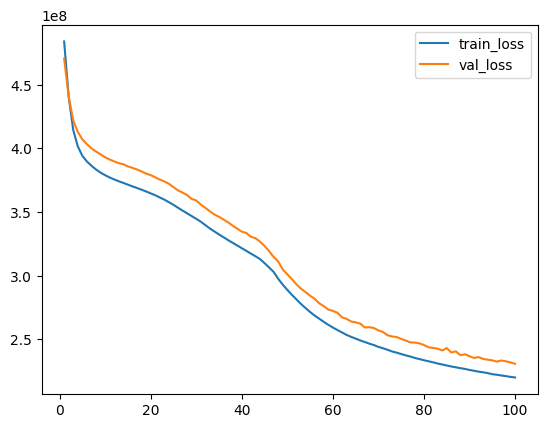

In [ ]:
result4=pd.DataFrame(result.history)
plt.plot(range(1,101),result4['loss'],label="train_loss")
plt.plot(range(1,101),result4['val_loss'],label="val_loss")
plt.legend()
plt.show()

In [ ]:
result4.iloc[-1]

,99
loss,2.200956e+08
mean_absolute_error,9.281344e+03
mean_absolute_percentage_error,1.430417e+09
val_loss,2.308174e+08
val_mean_absolute_error,9.414915e+03
val_mean_absolute_percentage_error,2.088366e+09


In [ ]:
model4.evaluate(x_test_ss, y_test)

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 224814736.0000 - mean_absolute_error: 9441.3057 - mean_absolute_percentage_error: 1489543936.0000


[227866400.0, 9440.7373046875, 1715397760.0]

In [ ]:
pred=[1,1,1,151315,42.31,2.572,4866.2909,24157.0344,376.8238,1187.4454,4158.9236,211.096358,8.106,0,5,2,2010]
te=pd.DataFrame(pred).T
te_ss=scaler.transform(te)
te_df=pd.DataFrame(te_ss, columns=x_train_df.columns)
model4.predict(te_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[27623.043]], dtype=float32)

In [ ]:
model4.save('model_aug_23(100).h5')

In [ ]:
pred=[1,1,1,151315,42.31,2.572,4866.2909,24157.0344,376.8238,1187.4454,4158.9236,211.096358,8.106,0,5,2,2010]
te=pd.DataFrame(pred).T
custom_objects = {'LeakyReLU': LeakyReLU}
ch_model=load_model('/content/model_aug_23(100).h5', custom_objects =custom_objects)
ch_model.compile(optimizer="adam",loss="mean_squared_error",
               metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanAbsolutePercentageError()])

In [ ]:
te_ss=scaler.transform(te)
te_df=pd.DataFrame(te_ss)
ch_model.predict(te_df)
ch_model.predict(te_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[27623.043]], dtype=float32)

In [ ]:
#model10

In [28]:
model10=Sequential()

model10.add(Dense(64,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
model10.add(Dense(32,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
model10.add(Dense(1))


model10.compile(optimizer="adam",loss="mean_squared_error",metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanAbsolutePercentageError()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
result10=model10.fit(x_train_df,y_train,epochs=75,validation_split=0.2,batch_size=32)

Epoch 1/75
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 564635456.0000 - mean_absolute_error: 14471.0156 - mean_absolute_percentage_error: 2403895552.0000 - val_loss: 464144960.0000 - val_mean_absolute_error: 14478.4131 - val_mean_absolute_percentage_error: 1169419264.0000
Epoch 2/75
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 466311424.0000 - mean_absolute_error: 14403.0215 - mean_absolute_percentage_error: 3909404928.0000 - val_loss: 446778496.0000 - val_mean_absolute_error: 14140.0791 - val_mean_absolute_percentage_error: 1146029440.0000
Epoch 3/75
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 432330752.0000 - mean_absolute_error: 13793.1514 - mean_absolute_percentage_error: 4221377280.0000 - val_loss: 419468096.0000 - val_mean_absolute_error: 13314.1787 - val_mean_absolute_percentage_error: 898285504.0000
Epoch 4/75
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 413262784.0000 - mean_absolute_error: 13119.3564 - mean_absolute_percentage_error: 3100669696.0

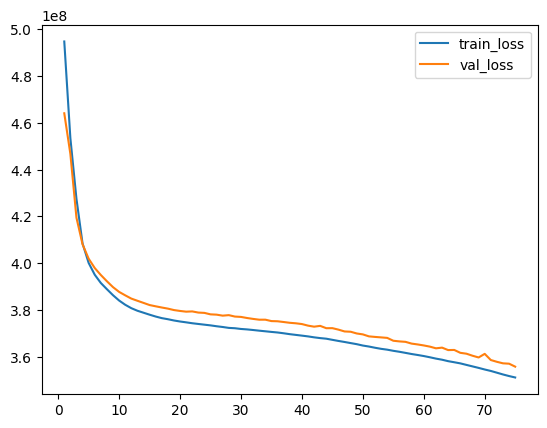

In [30]:
result10_df=pd.DataFrame(result10.history)
plt.plot(range(1,76),result10_df['loss'],label="train_loss")
plt.plot(range(1,76),result10_df['val_loss'],label="val_loss")
plt.legend()
plt.show()

In [31]:
result10_df.iloc[-1]

,74
loss,3.511147e+08
mean_absolute_error,1.146628e+04
mean_absolute_percentage_error,2.487973e+09
val_loss,3.557492e+08
val_mean_absolute_error,1.152474e+04
val_mean_absolute_percentage_error,5.905933e+08


In [32]:
model10.evaluate(x_test_ss, y_test)

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 355439712.0000 - mean_absolute_error: 11498.9375 - mean_absolute_percentage_error: 1562281984.0000


[356099328.0, 11516.041015625, 1456859648.0]

In [ ]:
pred=[1,1,1,151315,42.31,2.572,4866.2909,24157.0344,376.8238,1187.4454,4158.9236,211.096358,8.106,0,5,2,2010]
te=pd.DataFrame(pred).T
te_ss=scaler.transform(te)
te_df=pd.DataFrame(te_ss, columns=x_train_df.columns)
model10.predict(te_df)

In [ ]:
#model8, epoch70

In [12]:
model8=Sequential()

model8.add(Dense(64,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
model8.add(Dense(64,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
model8.add(Dense(1))


model8.compile(optimizer="adam",loss="mean_squared_error",metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanAbsolutePercentageError()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
result8=model8.fit(x_train_df,y_train,epochs=70,validation_split=0.2,batch_size=32)

Epoch 1/70
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 50s 6ms/step - loss: 550267712.0000 - mean_absolute_error: 14379.5605 - mean_absolute_percentage_error: 2108762368.0000 - val_loss: 459339840.0000 - val_mean_absolute_error: 14471.6787 - val_mean_absolute_percentage_error: 2732382464.0000
Epoch 2/70
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - loss: 452756160.0000 - mean_absolute_error: 14242.9639 - mean_absolute_percentage_error: 3327020800.0000 - val_loss: 429467136.0000 - val_mean_absolute_error: 13740.4834 - val_mean_absolute_percentage_error: 2376318464.0000
Epoch 3/70
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 426532992.0000 - mean_absolute_error: 13455.4395 - mean_absolute_percentage_error: 2623040768.0000 - val_loss: 409519840.0000 - val_mean_absolute_error: 12923.5449 - val_mean_absolute_percentage_error: 1916208000.0000
Epoch 4/70
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 406727008.0000 - mean_absolute_error: 12857.7529 - mean_absolute_percentage_error: 2021982336.

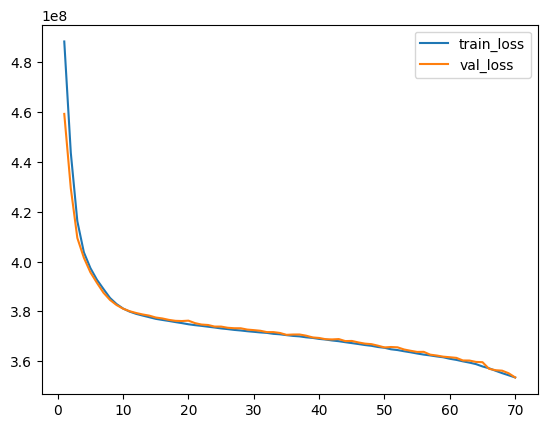

In [ ]:
result8_df=pd.DataFrame(result8.history)
plt.plot(range(1,71),result8_df['loss'],label="train_loss")
plt.plot(range(1,71),result8_df['val_loss'],label="val_loss")
plt.legend()
plt.show()

In [ ]:
result8_df.iloc[-1]

,69
loss,3.535066e+08
mean_absolute_error,1.154414e+04
mean_absolute_percentage_error,2.240799e+09
val_loss,3.535215e+08
val_mean_absolute_error,1.167025e+04
val_mean_absolute_percentage_error,1.803333e+09


In [ ]:
model8.evaluate(x_test_ss, y_test)

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 360549216.0000 - mean_absolute_error: 11779.1992 - mean_absolute_percentage_error: 1605917312.0000


[362086016.0, 11741.9912109375, 1378276096.0]

In [ ]:
pred=[1,1,1,151315,42.31,2.572,4866.2909,24157.0344,376.8238,1187.4454,4158.9236,211.096358,8.106,0,5,2,2010]
te=pd.DataFrame(pred).T
te_ss=scaler.transform(te)
te_df=pd.DataFrame(te_ss)
model8.predict(te_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[27878.305]], dtype=float32)

In [ ]:
pred=[45,98,2,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,26,10,2012]
te=pd.DataFrame(pred).T
te_ss=scaler.transform(te)
te_df=pd.DataFrame(te_ss)
model8.predict(te_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


array([[22516.525]], dtype=float32)

In [ ]:
model8.save('model_aug_23.h5')

In [ ]:
# model7, minmax scaler and relu

In [ ]:
scaler_mm=MinMaxScaler()
scaler_mm.fit(x_train)
x_train_scaler_mm=scaler_mm.transform(x_train)
x_test_scaler_mm=scaler_mm.transform(x_test)
x_train_df_mm=pd.DataFrame(x_train_scaler_mm,columns=x_train.columns)
x_test_df_mm=pd.DataFrame(x_test_scaler_mm,columns=x_test.columns)




model7=Sequential()

model7.add(Dense(64,input_dim=(len(x_train_ss[0])),activation="relu"))
model7.add(Dense(64,input_dim=(len(x_train_ss[0])),activation="relu"))
model7.add(Dense(1))


model7.compile(optimizer="adam",loss="mean_squared_error",metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanAbsolutePercentageError()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
result7=model7.fit(x_train_df_mm,y_train,epochs=200,validation_split=0.2,batch_size=32)

Epoch 1/200
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 535345344.0000 - mean_absolute_error: 14704.9277 - mean_absolute_percentage_error: 2252851712.0000 - val_loss: 474896288.0000 - val_mean_absolute_error: 14851.8242 - val_mean_absolute_percentage_error: 2659212544.0000
Epoch 2/200
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 476529248.0000 - mean_absolute_error: 14626.7695 - mean_absolute_percentage_error: 2776866560.0000 - val_loss: 471474528.0000 - val_mean_absolute_error: 14570.4023 - val_mean_absolute_percentage_error: 2577320960.0000
Epoch 3/200
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 462615200.0000 - mean_absolute_error: 14431.1221 - mean_absolute_percentage_error: 2703294208.0000 - val_loss: 466165856.0000 - val_mean_absolute_error: 14496.7510 - val_mean_absolute_percentage_error: 2632782592.0000
Epoch 4/200
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 463612960.0000 - mean_absolute_error: 14422.3242 - mean_absolute_percentage_error: 2549772

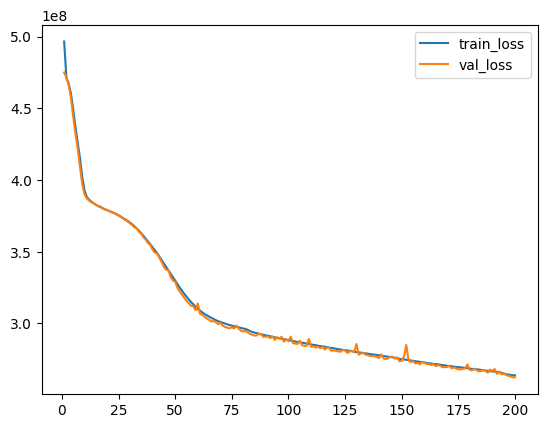

In [ ]:
result7_df=pd.DataFrame(result7.history)
plt.plot(range(1,201),result7_df['loss'],label="train_loss")
plt.plot(range(1,201),result7_df['val_loss'],label="val_loss")
plt.legend()
plt.show()

In [ ]:
result7_df.iloc[-1]

,199
loss,2.638294e+08
mean_absolute_error,1.016252e+04
mean_absolute_percentage_error,2.142149e+09
val_loss,2.625873e+08
val_mean_absolute_error,1.013348e+04
val_mean_absolute_percentage_error,1.572029e+09


In [ ]:
model7.evaluate(x_test_ss, y_test)

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 415727616000.0000 - mean_absolute_error: 485554.6250 - mean_absolute_percentage_error: 47997894656.0000


[415841288192.0, 486257.34375, 39950852096.0]

In [ ]:
pred=[1,1,1,151315,42.31,2.572,4866.2909,24157.0344,376.8238,1187.4454,4158.9236,211.096358,8.106,0,5,2,2010]
te=pd.DataFrame(pred).T
te_ss=scaler.transform(te)
te_df=pd.DataFrame(te_ss)
model7.predict(te_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


array([[-873730.5]], dtype=float32)

In [ ]:
#model5, no standard scaler

In [ ]:
model5=Sequential()

model5.add(Dense(64,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
model5.add(Dense(64,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
model5.add(Dense(1))


model5.compile(optimizer="adam",loss="mean_squared_error",metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanAbsolutePercentageError()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
result5=model5.fit(x_train,y_train,epochs=100,validation_split=0.2,batch_size=32)

Epoch 1/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 491243392.0000 - mean_absolute_error: 14514.8867 - mean_absolute_percentage_error: 2936228352.0000 - val_loss: 475396640.0000 - val_mean_absolute_error: 14556.7627 - val_mean_absolute_percentage_error: 2530521600.0000
Epoch 2/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 491810304.0000 - mean_absolute_error: 14558.1172 - mean_absolute_percentage_error: 2815233792.0000 - val_loss: 471181216.0000 - val_mean_absolute_error: 14645.3262 - val_mean_absolute_percentage_error: 2610499840.0000
Epoch 3/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 480664352.0000 - mean_absolute_error: 14457.0781 - mean_absolute_percentage_error: 3536593920.0000 - val_loss: 464729440.0000 - val_mean_absolute_error: 14219.2402 - val_mean_absolute_percentage_error: 2498132480.0000
Epoch 4/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 483325216.0000 - mean_absolute_error: 14423.1807 - mean_absolute_percentage_error: 3562613

In [ ]:
result5_df=pd.DataFrame(result5.history)

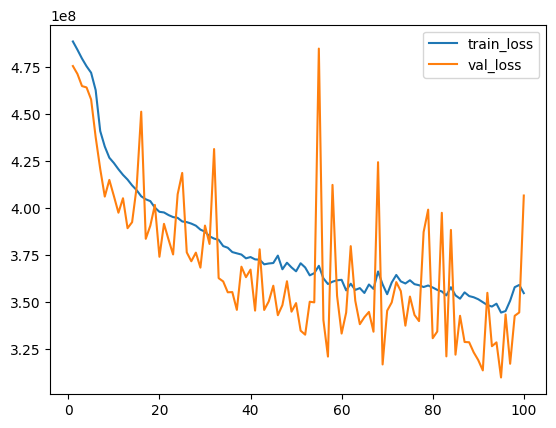

In [ ]:
plt.plot(range(1,101),result5_df['loss'],label="train_loss")
plt.plot(range(1,101),result5_df['val_loss'],label="val_loss")
plt.legend()
plt.show()

In [ ]:
result5.iloc[-1]

In [ ]:
model5.evaluate(x_test, y_test)

In [ ]:
###dropout

In [ ]:
model2=Sequential()

model2.add(Dense(64,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
#model2.add(Dropout(0.2))
model2.add(Dense(32,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
#model2.add(Dropout(0.1))
model2.add(Dense(32,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
model2.add(Dense(8,input_dim=(len(x_train_ss[0])),activation=LeakyReLU(alpha=0.01)))
model2.add(Dense(1)) #output layer

model2.compile(optimizer="adam",loss="mean_squared_error",metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanAbsolutePercentageError()])
result=model2.fit(x_train_df,y_train,epochs=100,validation_split=0.2,batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 477482880.0000 - mean_absolute_error: 14085.1025 - mean_absolute_percentage_error: 2128059392.0000 - val_loss: 414586720.0000 - val_mean_absolute_error: 12502.8916 - val_mean_absolute_percentage_error: 2614962176.0000
Epoch 2/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 393065536.0000 - mean_absolute_error: 12379.1875 - mean_absolute_percentage_error: 1474578432.0000 - val_loss: 398642496.0000 - val_mean_absolute_error: 12221.3008 - val_mean_absolute_percentage_error: 2404356864.0000
Epoch 3/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 378591744.0000 - mean_absolute_error: 12119.4512 - mean_absolute_percentage_error: 1683837440.0000 - val_loss: 391721184.0000 - val_mean_absolute_error: 12115.4863 - val_mean_absolute_percentage_error: 2457815040.0000
Epoch 4/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 372125184.0000 - mean_absolute_error: 11985.8193 - mean_absolute_percentage_error: 1838165

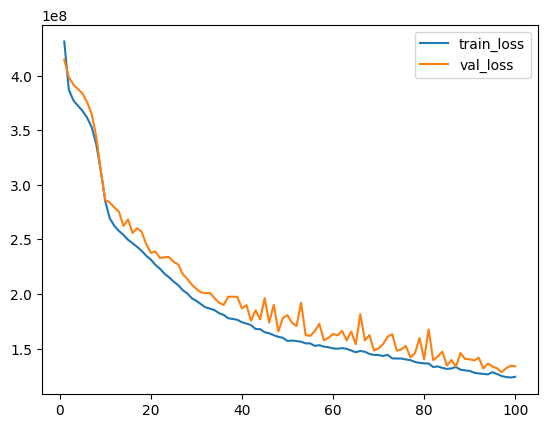

In [ ]:
result_df=pd.DataFrame(result.history)
plt.plot(range(1,101),result_df['loss'],label="train_loss")
plt.plot(range(1,101),result_df['val_loss'],label="val_loss")
plt.legend()
plt.show()

In [ ]:
#sigmoid

In [25]:
scaler_mm=MinMaxScaler()
scaler_mm.fit(x_train)
x_train_scaler_mm=scaler_mm.transform(x_train)
x_test_scaler_mm=scaler_mm.transform(x_test)
x_train_df_mm=pd.DataFrame(x_train_scaler_mm,columns=x_train.columns)
x_test_df_mm=pd.DataFrame(x_test_scaler_mm,columns=x_test.columns)

model_sig=Sequential()


model_sig.add(Dense(64,input_dim=(len(x_train_scaler_mm[0])),activation="sigmoid"))
model_sig.add(Dense(32,input_dim=(len(x_train_scaler_mm[0])),activation="sigmoid"))
model_sig.add(Dense(8,input_dim=(len(x_train_scaler_mm[0])),activation="sigmoid"))

model_sig.add(Dense(1))

model_sig.compile(optimizer="adam",loss="mean_squared_error",metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanAbsolutePercentageError()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
result_sig=model_sig.fit(x_train_df_mm,y_train,epochs=100,validation_split=0.2,batch_size=32)

Epoch 1/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 769949568.0000 - mean_absolute_error: 15919.5615 - mean_absolute_percentage_error: 3631609.0000 - val_loss: 772753024.0000 - val_mean_absolute_error: 15986.8418 - val_mean_absolute_percentage_error: 6252254.5000
Epoch 2/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 760482176.0000 - mean_absolute_error: 15855.0713 - mean_absolute_percentage_error: 16817064.0000 - val_loss: 770927872.0000 - val_mean_absolute_error: 15936.3281 - val_mean_absolute_percentage_error: 12190584.0000
Epoch 3/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 758251264.0000 - mean_absolute_error: 15750.7764 - mean_absolute_percentage_error: 22576396.0000 - val_loss: 768612352.0000 - val_mean_absolute_error: 15874.3721 - val_mean_absolute_percentage_error: 19750190.0000
Epoch 4/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 753019584.0000 - mean_absolute_error: 15759.4375 - mean_absolute_percentage_error: 43151356.0000 - val_l

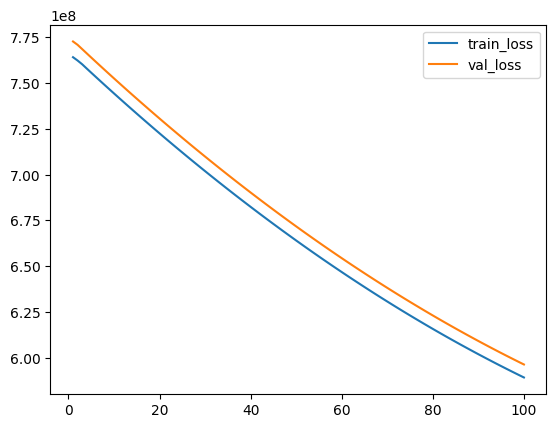

In [27]:
result_sig_df=pd.DataFrame(result_sig.history)
plt.plot(range(1,101),result_sig_df['loss'],label="train_loss")
plt.plot(range(1,101),result_sig_df['val_loss'],label="val_loss")
plt.legend()
plt.show()

In [ ]:
result_sig_df.iloc[-1]

,99
loss,5.134689e+08
mean_absolute_error,1.509421e+04
mean_absolute_percentage_error,3.007992e+09
val_loss,5.166761e+08
val_mean_absolute_error,1.517904e+04
val_mean_absolute_percentage_error,2.358894e+09


In [ ]:
pred=[1,20,2,151320,47,3,4870,24160,380,1190,4158,220,8,0,5,2,2012]
#pred=[1,1,1,151315,42.31,2.572,4866.2909,24157.0344,376.8238,1187.4454,4158.9236,211.096358,8.106,0,5,2,2010]
te=pd.DataFrame(pred).T
te_ss=scaler_mm.transform(te)
te_df=pd.DataFrame(te_ss, columns=x_train_df.columns)
#te = np.array(te, dtype=np.float32)
model_sig.predict(te)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[-0.41732907]], dtype=float32)

In [ ]:
# skewed dataset

In [ ]:
sales_skew=pd.read_csv('/content/final_project_skewed.csv')

In [ ]:
xs=sales_skew.drop('Weekly_Sales_sqrt', axis=1)
ys=sales_skew['Weekly_Sales_sqrt']

In [ ]:
xs_train,xs_test,ys_train,ys_test=train_test_split(xs,ys,test_size=0.2)

In [ ]:
scaler=StandardScaler().fit(xs_train)
xs_train_ss=scaler.transform(xs_train)
xs_test_ss=scaler.transform(xs_test)

In [ ]:
xs_train_df=pd.DataFrame(xs_train_ss,columns=xs_train.columns)
xs_test_df=pd.DataFrame(xs_test_ss,columns=xs_test.columns)

In [ ]:
model_sk=Sequential()

model_sk.add(Dense(64,input_shape=(xs_train_df.shape[1],),activation=LeakyReLU(alpha=0.01)))
model_sk.add(Dense(64,input_shape=(xs_train_df.shape[1],),activation=LeakyReLU(alpha=0.01)))


model_sk.add(Dense(1))

model_sk.compile(optimizer="adam",loss="mean_squared_error",metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanAbsolutePercentageError()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
result_s=model_sk.fit(xs_train_df,ys_train,epochs=100,validation_split=0.2,batch_size=32)

Epoch 1/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 21322.7793 - mean_absolute_error: 110.2159 - mean_absolute_percentage_error: 66936428.0000 - val_loss: 15348.6719 - val_mean_absolute_error: 93.4848 - val_mean_absolute_percentage_error: 89417816.0000
Epoch 2/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 15255.8584 - mean_absolute_error: 91.8997 - mean_absolute_percentage_error: 66907032.0000 - val_loss: 14548.4951 - val_mean_absolute_error: 90.2228 - val_mean_absolute_percentage_error: 84151640.0000
Epoch 3/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 14381.7607 - mean_absolute_error: 89.2089 - mean_absolute_percentage_error: 77197016.0000 - val_loss: 13872.5586 - val_mean_absolute_error: 86.7818 - val_mean_absolute_percentage_error: 77955976.0000
Epoch 4/100
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 13926.5146 - mean_absolute_error: 87.6614 - mean_absolute_percentage_error: 66520856.0000 - val_loss: 13398.4297 - val_mean_absolute_error: 85.

In [ ]:
result_s_df=pd.DataFrame(result_s.history)

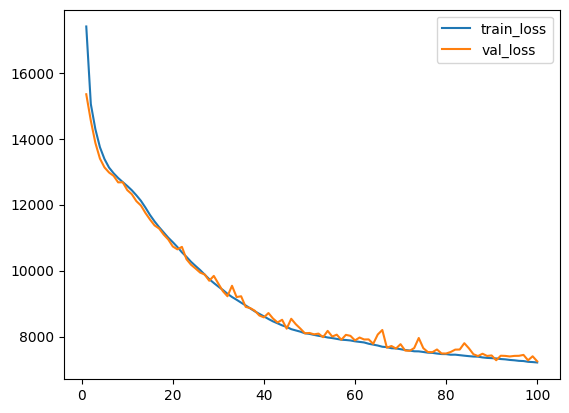

In [ ]:
plt.plot(range(1,101),result_s_df['loss'],label="train_loss")
plt.plot(range(1,101),result_s_df['val_loss'],label="val_loss")
plt.legend()
plt.show()

In [ ]:
model_sk.predict(te)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


array([[26936474.]], dtype=float32)

In [ ]:
# from the above trained models, model4 have minimum loss and in ideal point